In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
dfh = pd.read_csv(r"C:\Users\LENOVO\Desktop\AI\heart.csv")

In [7]:
dfh

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [9]:
dfh.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [10]:
dfh.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

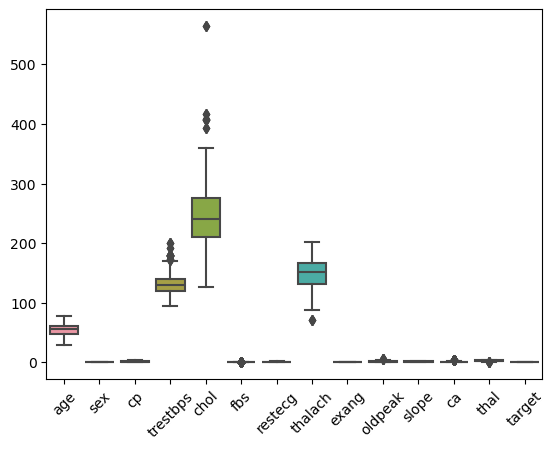

In [11]:
sns.boxplot(dfh)
plt.xticks(rotation = 45)
plt.show()

In [12]:
dfh.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [13]:
cols = ['trestbps', 'chol', 'fbs','thalach',
       'oldpeak','ca', 'thal']

In [14]:
cols

['trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca', 'thal']

In [15]:
import time

In [16]:
for c in cols :
    print(c)
    time.sleep(0.2)

trestbps
chol
fbs
thalach
oldpeak
ca
thal


In [23]:
for c in cols :
    print(dfh[c])
    time.sleep(0.5)

0       125.0
1       140.0
2       145.0
3       148.0
4       138.0
        ...  
1020    140.0
1021    125.0
1022    110.0
1023    110.0
1024    120.0
Name: trestbps, Length: 1025, dtype: float64
0       212.0
1       203.0
2       174.0
3       203.0
4       294.0
        ...  
1020    221.0
1021    258.0
1022    275.0
1023    254.0
1024    188.0
Name: chol, Length: 1025, dtype: float64
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1020    0.0
1021    0.0
1022    0.0
1023    0.0
1024    0.0
Name: fbs, Length: 1025, dtype: float64
0       168.0
1       155.0
2       125.0
3       161.0
4       106.0
        ...  
1020    164.0
1021    141.0
1022    118.0
1023    159.0
1024    113.0
Name: thalach, Length: 1025, dtype: float64
0       1.0
1       3.1
2       2.6
3       0.0
4       1.9
       ... 
1020    0.0
1021    2.8
1022    1.0
1023    0.0
1024    1.4
Name: oldpeak, Length: 1025, dtype: float64
0       2.0
1       0.0
2       0.0
3       1.0
4       2.5


In [24]:
for c in cols :
    sk = dfh[c].skew().round()
    if sk == 0 or sk == -0:
        print("Normal Distibution")
    else:
        print("Skewed Distibution")

    print(c, end = "==>")
    print(sk)
    time.sleep(0.5)

Normal Distibution
trestbps==>0.0
Normal Distibution
chol==>0.0
Normal Distibution
fbs==>0.0
Normal Distibution
thalach==>-0.0
Skewed Distibution
oldpeak==>1.0
Skewed Distibution
ca==>1.0
Normal Distibution
thal==>-0.0


In [25]:
for c in cols :
    sk = dfh[c].skew().round()
    if sk == 0 or sk == -0:
        m = dfh[c].mean()
        s = dfh[c].std()
        lowerlimit = m - 3 * s
        upperlimit = m + 3 * s
        dfh[c] = dfh[c].map(lambda x : lower if x < lowerlimit else upper if x > upperlimit else x )
    else:
        q1 = dfh[c].quantile(0.25)
        q3 = dfh[c].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - (1.5*iqr)
        upper = q3 + (1.5*iqr)
        dfh[c] = dfh[c].map(lambda x : lower if x < lower else upper if x > upper else x)
    time.sleep(0.5)

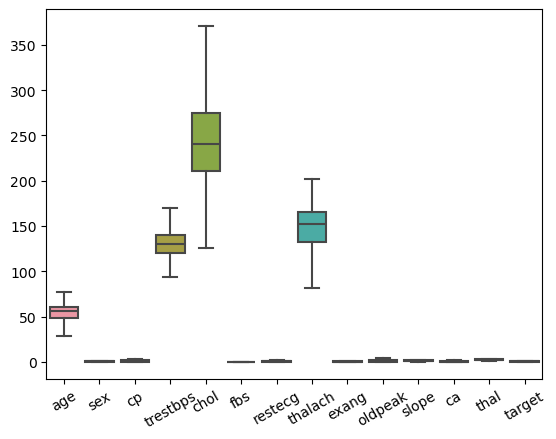

In [26]:
sns.boxplot(dfh)
plt.xticks(rotation = 30)
plt.show()